In [1]:
#mount our drive to the google colab

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [3]:
#import the libraries used in the project

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [5]:
#import our dataset for training of our model
mob_data=pd.read_csv("/content/drive/MyDrive/Doc/DPA/mobile_train_missing.csv")

In [6]:
mob_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,2,20.0,756.0,2549.0,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,6,905.0,1988.0,2631.0,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,6,1263.0,1716.0,NaN,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,9,NaN,1786.0,2769.0,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,14,NaN,1212.0,1411.0,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22.0,0.7,164,1,7,1004.0,1654.0,1067.0,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10.0,0.8,139,8,10,381.0,NaN,3220.0,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24.0,0.8,187,4,0,512.0,1149.0,700.0,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53.0,0.7,174,7,14,386.0,836.0,1099.0,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,NaN,0.1,93,5,15,NaN,1224.0,513.0,19,10,12,1,0,0,0


In [7]:
mob_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1953 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      1946 non-null   float64
 12  px_width       1977 non-null   float64
 13  ram            1975 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
mob_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,1953.000000,2000.000000,2000.000000,2000.000000,2000.000000,1946.000000,1977.000000,1975.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.283666,0.501750,140.249000,4.520500,9.916500,648.949640,1254.767830,2130.209114,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.075219,0.288416,35.399655,2.287837,6.064315,441.236784,431.833883,1080.914293,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,291.000000,881.000000,1214.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,572.000000,1251.000000,2150.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,946.750000,1634.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3996.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
#check for the null values in the dataset

mob_data.isnull().values.any()

True

In [10]:
mob_data.isnull().sum()

battery_power     0
blue              0
clock_speed       0
dual_sim          0
fc                0
four_g            0
int_memory       47
m_dep             0
mobile_wt         0
n_cores           0
pc                0
px_height        54
px_width         23
ram              25
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [11]:

#outliers estimation using Z-score method

mean = np.mean(mob_data.px_height) 
std = np.std(mob_data.px_height) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 
threshold = 2.5
outlier = [] 
for i in mob_data.px_height: 
	z = (i-mean)/std 
	if z > threshold: 
		outlier.append(i) 
print('outlier in dataset is', outlier) 



mean of the dataset is 648.9496402877697
std. deviation is 441.12339949157956
outlier in dataset is [1770.0, 1852.0, 1914.0, 1858.0, 1830.0, 1869.0, 1792.0, 1789.0, 1802.0, 1791.0, 1795.0, 1842.0, 1920.0, 1949.0, 1895.0, 1901.0, 1826.0, 1878.0, 1836.0, 1801.0, 1765.0, 1874.0, 1790.0, 1791.0, 1960.0, 1899.0]


In [12]:
#missing values are filled with mean of the dataset attributes respectively

mob_data_mean = mob_data.fillna(mob_data.mean())

In [13]:
#few visualization techniques for the outliers estimation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68308fde48>]],
      dtype=object)

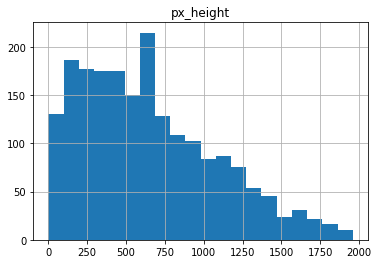

In [14]:
mob_data_mean.hist('px_height',bins=20)

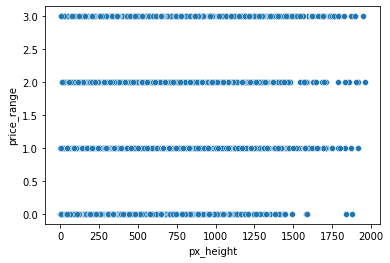

In [15]:
sns.scatterplot(x='px_height',y='price_range',data = mob_data_mean)

In [16]:
#for the box plotting of the datapoints and missing values estimations

In [17]:
#using mean
mob_data_mean1 = mob_data_mean['int_memory']               
mob_data_mean2 = mob_data_mean['px_height']
mob_data_mean3 = mob_data_mean['px_width']
mob_data_mean4 = mob_data_mean['ram']

In [18]:
fig = go.Figure()
fig.add_trace(go.Box(x=mob_data_mean1, name='int_memory'))
fig.add_trace(go.Box(x=mob_data_mean2, name='px_height'))
fig.add_trace(go.Box(x=mob_data_mean3, name='px_width'))
fig.add_trace(go.Box(x=mob_data_mean4, name='ram'))

In [19]:
#using mode

mob_data_mode1 = mob_data.fillna(mob_data['int_memory'].mode()[0])
mob_data_mode2 = mob_data.fillna(mob_data['px_height'].mode()[0])
mob_data_mode3 = mob_data.fillna(mob_data['px_width'].mode()[0])
mob_data_mode4 = mob_data.fillna(mob_data['ram'].mode()[0])

In [20]:
fig = go.Figure()
fig.add_trace(go.Box(x=mob_data_mode1['int_memory'], name='int_memory'))
fig.add_trace(go.Box(x=mob_data_mode2['px_height'], name='px_height'))
fig.add_trace(go.Box(x=mob_data_mode3['px_width'], name='px_width'))
fig.add_trace(go.Box(x=mob_data_mode4['ram'], name='ram'))

In [21]:
#using median

mob_data_median = mob_data.fillna(mob_data.median())

In [22]:
mob_data_median1 = mob_data_median['int_memory']               
mob_data_median2 = mob_data_median['px_height']
mob_data_median3 = mob_data_median['px_width']
mob_data_median4 = mob_data_median['ram']

In [23]:
fig = go.Figure()
fig.add_trace(go.Box(x=mob_data_median1, name='int_memory'))
fig.add_trace(go.Box(x=mob_data_median2, name='px_height'))
fig.add_trace(go.Box(x=mob_data_median3, name='px_width'))
fig.add_trace(go.Box(x=mob_data_median4, name='ram'))

In [24]:
#using standard devidation

mob_data_std = mob_data.fillna(mob_data.std())

In [25]:
mob_data_std1 = mob_data_std['int_memory']               
mob_data_std2 = mob_data_std['px_height']
mob_data_std3 = mob_data_std['px_width']
mob_data_std4 = mob_data_std['ram']

In [26]:
fig = go.Figure()
fig.add_trace(go.Box(x=mob_data_std1, name='int_memory'))
fig.add_trace(go.Box(x=mob_data_std2, name='px_height'))
fig.add_trace(go.Box(x=mob_data_std3, name='px_width'))
fig.add_trace(go.Box(x=mob_data_std4, name='ram'))

In [27]:
#releationship of some attributes with the target attribute

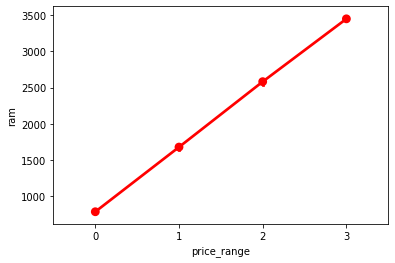

In [28]:
sns.pointplot(y='ram',x='price_range',data = mob_data,color = 'red')

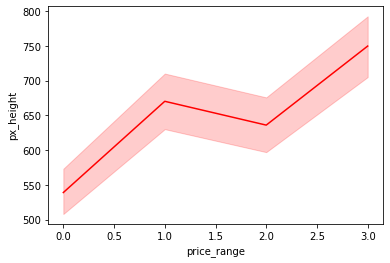

In [29]:
sns.lineplot(y='px_height',x='price_range',data = mob_data,color = 'red')

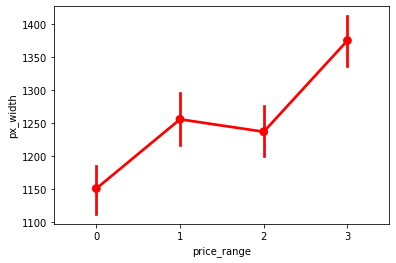

In [30]:
sns.pointplot(y='px_width',x='price_range',data = mob_data,color = 'red')

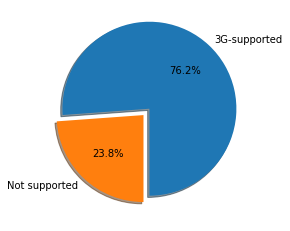

In [31]:
labels = ["3G-supported",'Not supported']
values=mob_data['three_g'].value_counts().values
explode=(0.1,0)

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,explode=explode, autopct='%1.1f%%',shadow=True,startangle=270)
plt.show()

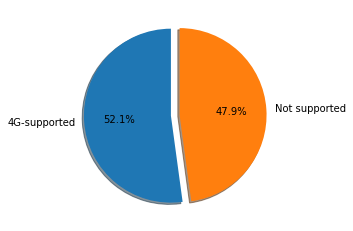

In [32]:
labels4g = ["4G-supported",'Not supported']
values4g = mob_data['four_g'].value_counts().values
explode=(0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g,explode=explode, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [33]:
#feature selection techniques

In [34]:
#using PCC

pearsoncorr = mob_data.corr(method='pearson')

In [35]:
pearsoncorr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.005328,0.034085,0.001844,-0.029727,0.031441,0.015914,-0.007264,0.001725,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.035970,0.004049,-0.008605,0.036161,-0.009952,-0.010983,-0.042250,0.025901,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.003920,-0.014364,0.012350,-0.005724,-0.005245,-0.019863,-0.007995,0.002699,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.012824,-0.022142,-0.008979,-0.024658,-0.017143,-0.024035,0.014192,0.041011,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.034981,-0.001791,0.023618,-0.013356,0.644595,-0.012946,-0.004529,0.012256,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.010759,-0.001823,-0.016537,-0.029706,-0.005598,-0.017250,0.008071,0.009449,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.005328,0.035970,0.003920,-0.012824,-0.034981,0.010759,1.000000,0.006857,-0.037857,-0.026277,-0.032980,0.010868,-0.003455,0.033349,0.041381,0.011036,-0.006268,-0.012065,-0.029638,0.003743,0.045924
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006857,1.000000,0.021756,-0.003504,0.026282,0.028878,0.025802,-0.007308,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.037857,0.021756,1.000000,-0.018989,0.018844,0.005320,0.005523,-0.009365,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.026277,-0.003504,-0.018989,1.000000,-0.001193,-0.009634,0.026565,-0.002245,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


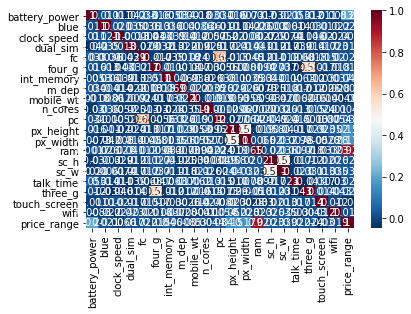

In [36]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,)

In [37]:
#set the price_range as the target value

target_value = mob_data.price_range

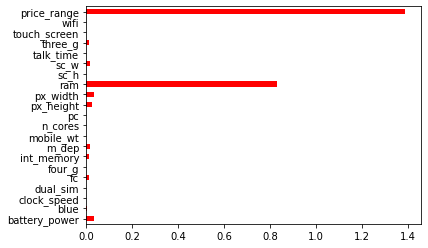

In [38]:
#using Information gain method

importances = mutual_info_classif(mob_data_mean, target_value)
feat_importances = pd.Series(importances, mob_data_mean.columns[0:len(mob_data_mean.columns)])
feat_importances.plot(kind='barh',color = 'red')
plt.show()

In [39]:
#learning of the model begins

In [40]:
#set the price_range as the target value

target_value = mob_data.price_range

In [41]:
#split dataset into train and testing datasets

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(mob_data_mean, target_value, test_size=0.33, random_state=101)

In [44]:
#Using Chi2 method

#chi2_features = SelectKBest(chi2, k = 10)
X_best = chi2(X_train, Y_train)

In [45]:
X_best

(array([9.89655853e+03, 2.56817201e-01, 1.90128313e+00, 1.69600441e+00,
        1.24909402e+01, 9.03825033e-01, 2.88576155e+01, 2.47185256e-01,
        9.44532828e+01, 1.12402577e+01, 9.29133841e+00, 8.56006219e+03,
        4.39188149e+03, 6.11532562e+05, 7.22435115e+00, 1.07368787e+01,
        3.22368682e+00, 3.62192652e-02, 1.25234627e+00, 2.66768340e-01,
        1.15203355e+03]),
 array([0.00000000e+000, 9.67934271e-001, 5.93146336e-001, 6.37822471e-001,
        5.87738264e-003, 8.24504644e-001, 2.39913176e-006, 9.69634841e-001,
        2.41994736e-020, 1.04951846e-002, 2.56579812e-002, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 6.50805188e-002, 1.32371762e-002,
        3.58406022e-001, 9.98186514e-001, 7.40478800e-001, 9.66152284e-001,
        1.87129466e-249]))

In [46]:
p_values = pd.Series(X_best[1])
p_values.index = X_train.columns
p_values.sort_values(ascending=False)

three_g           9.981865e-01
m_dep             9.696348e-01
blue              9.679343e-01
wifi              9.661523e-01
four_g            8.245046e-01
touch_screen      7.404788e-01
dual_sim          6.378225e-01
clock_speed       5.931463e-01
talk_time         3.584060e-01
sc_h              6.508052e-02
pc                2.565798e-02
sc_w              1.323718e-02
n_cores           1.049518e-02
fc                5.877383e-03
int_memory        2.399132e-06
mobile_wt         2.419947e-20
price_range      1.871295e-249
px_height         0.000000e+00
px_width          0.000000e+00
ram               0.000000e+00
battery_power     0.000000e+00
dtype: float64

In [47]:
#Smaller the p_value, more significant the feature is to predict the target value i.e. price_prediction in the dataset. Hence, ram, px_width, px_height, battery_power are the most important feature here.

In [48]:
#model training using KNN classification

In [49]:
training_data_featured = mob_data_mean.drop(['three_g','m_dep','blue','wifi','four_g','touch_screen','dual_sim','clock_speed','talk_time','sc_h','pc','sc_w','n_cores','fc','int_memory','mobile_wt','price_range'],axis = 'columns')

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(training_data_featured, target_value, test_size=0.33, random_state=101)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [52]:
knn_model.score(X_test,Y_test)

0.9166666666666666

In [53]:
#model training using Linear regression 

In [54]:
from sklearn.linear_model import LinearRegression
pred_model = LinearRegression()

In [55]:
pred_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
pred_model.score(X_test,Y_test)

0.8987886940977913

In [57]:
#accuracy of the KNN is more than Linear regression 
#so prediction is done using KNN model

In [58]:
test_dataset = pd.read_csv("/content/drive/MyDrive/Doc/DPA/mobile_test.csv")

In [59]:
testing_data = test_dataset.drop(['id','three_g','m_dep','blue','wifi','four_g','touch_screen','dual_sim','clock_speed','talk_time','sc_h','pc','sc_w','n_cores','fc','int_memory','mobile_wt'],axis = 'columns')

In [60]:
predicted_price = knn_model.predict(testing_data)

In [61]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 1, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 1, 0, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 2, 1, 3, 2, 0, 3, 0, 1, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [62]:
test_dataset['price_range']=predicted_price

In [63]:
test_dataset.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
